# 4.10 CODING ETIQUETTE & EXCEL REPORTING
** **

Goal will be to provide better insight for customer profiling in terms of ads, bonus programs, and sales information.

**SCRIPT CONTENTS:**

1. Importing Libraries & Files
2. Security Implications
3. Customer Behavior
    - Region Segmentation
    - Spending Habits
4. Exclusion Flags of Customer Activity
    - Low Activity
    - High Activity
5. Customer Profiling
   - Age
   - Income
   - By department_id:
          - Household Status (# 18)
          - Vegetarian Status (# 4, 9 & 16)
          - Pet Owner Status (# 8)
6. Customer Profile Visualization Charts
7. Aggregate (mean, min & max) of Customer Profiles
8. Comparison of Customer Profiles with Regions and Departments & Visualizations of results
9. Exporting Updated DataFrame and Charts.

** **
**Directions**

**1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data** _(i.e., the data set with your new customer data from the first part of this task)._

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Document File Location

path = r'C:\Users\G\12-2022 Instacart Basket Analysis'

In [3]:
# Import Recent Merged File (order, products & customer DataFrames)

final_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_final.pkl'))

In [4]:
# Import Transposed Departments Dataframe

df_depts = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_transposed.csv'), index_col = False)

In [5]:
# Import Wrangled Orders Dataframe

df_ords = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'orders_wrangled.csv'), index_col = False)

In [6]:
# Import Product Data Clean Dataframe

df_prods = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'Product Data Clean.csv'), index_col = False)

**2. Consider any** _security implications_ **that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.**

In [7]:
# Check DataFrame Data Types

final_df.dtypes

order_id                            int64
customer_id                         int64
order_number                        int64
order_day_of_week                   int64
order_hour_of_day                   int64
days_since_prior_order            float64
new_customer                         bool
product_id                          int64
add_to_cart_order                   int64
reordered                           int64
product_name                       object
aisle_id                            int64
department_id                       int64
prices                            float64
_merge                           category
price_range                        object
busiest_day                        object
busiest days                       object
busiest_period_of_day              object
max_order                           int64
loyalty_flag                       object
average_price                     float64
spender_flag                       object
median_days_since_prior_order     

In [8]:
# Checking Merged File DataFrame Output

final_df.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,order_frequency_flag,Name,Surname,Gender,State,Age,Member_Since,No_of_Dependants,Marital_Status,Income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


**NOTE: PERSONAL IDENTIFIABLE INFORMATION (PII) DATA SECURITY**

_The DataFrame above includes data points that may expose customer personal information like Names (including Surnames), this can be handled in 3 ways:_

1. Eliminate (or drop) columns with Names data entries.
2. Filter out columns with Names.
3. Maintain data points but provided notes to management team as we all to the stakeholders regarding this information.
 
_**For this case, columns with names can be will be dropped in complaince to customer privacy.**_

In [9]:
# Dropping columns Name and Surname. Check Output.

final_df2 = final_df.drop(columns = ['Name', 'Surname'])

final_df2.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,spender_flag,median_days_since_prior_order,order_frequency_flag,Gender,State,Age,Member_Since,No_of_Dependants,Marital_Status,Income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


**UPDATE** is successful. Name and Surname columns has been removed.

In [10]:
# Check point total customers

final_df2['customer_id'].nunique()

206208

**3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a** _“Region”_ **column based on the** _“State”_ **column from your customers data set.**

_A. Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions)._

In [11]:
# Checking State Column

final_df2['State'].head()

0    Alabama
1    Alabama
2    Alabama
3    Alabama
4    Alabama
Name: State, dtype: object

In [12]:
# Checking US frequency

final_df2['State'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Nevada                  636139
Arkansas                636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [13]:
# Verifying Update DataFrame Dimension

final_df2.shape

(32404854, 32)

In [14]:
# Defining Regions (function)

regionNE = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
regionMW = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
regionS = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
regionW = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [15]:
# Application of Regions (function) and Check Output

final_df2.loc[final_df2['State'].isin(regionNE), 'Region'] = 'Northeast'
final_df2.loc[final_df2['State'].isin(regionMW), 'Region'] = 'Midwest'
final_df2.loc[final_df2['State'].isin(regionS), 'Region'] = 'South'
final_df2.loc[final_df2['State'].isin(regionW), 'Region'] = 'West'

final_df2['Region'].value_counts(dropna = False)

South        10791880
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [16]:
# Checkpoint of DataFrame Dimension

final_df2.shape

(32404854, 33)

In [17]:
# Checking of Dataset Column-Headers

final_df2.columns

Index(['order_id', 'customer_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'price_range',
       'busiest_day', 'busiest days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price', 'spender_flag',
       'median_days_since_prior_order', 'order_frequency_flag', 'Gender',
       'State', 'Age', 'Member_Since', 'No_of_Dependants', 'Marital_Status',
       'Income', 'Region'],
      dtype='object')


  _B. Determine whether there’s a difference in spending habits between the different U.S. regions._ **(Hint: You can do this by crossing the variable you just created with the spending flag.)**

In [18]:
# Cross Referencing Customer's Spending Habits (function) in US Regions with spender_flag and Check Output

Spending_Habits = pd.crosstab(final_df2['spender_flag'], final_df2['Region'], dropna = False)

Spending_Habits

Region,Midwest,Northeast,South,West
spender_flag,,,,
High spender,155975,108225,209691,160354
Low spender,7441350,5614511,10582189,8132559


4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [19]:
# ACTIVITY FLAG: Creating customer activity conditions based on max_order values and Check Output

final_df2.loc[final_df2['max_order'] >= 5, 'activity_flag'] = 'High Activity'
final_df2.loc[final_df2['max_order'] < 5, 'activity_flag'] = 'Low Activity'

final_df2['activity_flag'].value_counts(dropna = False)

High Activity    30964564
Low Activity      1440290
Name: activity_flag, dtype: int64

In [20]:
# Create a subset for "Low Activity Customer" 

df_low_actvty = final_df2[final_df2['activity_flag'] == 'Low Activity']

df_low_actvty

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,order_frequency_flag,Gender,State,Age,Member_Since,No_of_Dependants,Marital_Status,Income,Region,activity_flag
1510,520620,120,1,3,11,NaN,True,196,2,0,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity
1511,3273029,120,3,2,8,19.0,False,196,2,1,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity
1512,520620,120,1,3,11,NaN,True,46149,1,0,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity
1513,3273029,120,3,2,8,19.0,False,46149,1,1,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity
1514,520620,120,1,3,11,NaN,True,26348,3,0,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404823,1947537,166751,3,4,7,0.0,False,49001,1,1,...,Frequent customer,Female,Oregon,38,8/17/2018,1,married,41766,West,Low Activity
32404850,484769,66343,1,6,11,NaN,True,47210,1,0,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity
32404851,1561557,66343,2,1,11,30.0,False,47210,1,1,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity
32404852,276317,66343,3,6,15,19.0,False,47210,1,1,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity


In [21]:
# Dropping Low Activity Customers from DataFrame and Check Output

df_high_actvty = final_df2.drop(final_df2[final_df2.max_order < 5].index)

df_high_actvty.shape

(30964564, 34)

In [22]:
# Exporting Low Activity Customers DataFrame (Sample)
df_low_actvty.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Low Activity Customers.pkl'))

# Exporting High Activity Customers DataFrame (Sample)
df_high_actvty.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'High Activity Customers.pkl'))

**5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the** _“department_id”_ **column, and number of dependents. You might also use the** _“orders_day_of_the_week”_ **and** _“order_hour_of_day”_ **columns if you can think of a way they would impact customer profiles.** _(Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)_

In [23]:
# Create a new DataFrame using High Activity Customers

df_cstmr_prfl = df_high_actvty

##### ...............-------------========================= CUSTOMER PROFILING BY: =========================-------------...............

** **
                                                        AGE

In [24]:
# Checking Age Column Statistical description

df_cstmr_prfl ['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

**NOTE:** Statistical output determines that 18 is the youngest (min) age while age 81 is the oldest (max) age group.

- Therefore, age groups will be calssifed below:
         a) SCHOOL AGE ADULT    18 - 29
         b) YOUNG ADULT         30 - 39
         c) MIDDLE AGE          40 - 49
         d) SENIOR MIDDLE AGE   50 - 59
         e) SENIOR              60 - older

In [25]:
# Creating column for AGE CATEGORY and Check Output

df_cstmr_prfl.loc[(df_cstmr_prfl['Age'] >= 18) & (df_cstmr_prfl['Age'] < 29), 'Age_Category'] = 'School Age Adult'
df_cstmr_prfl.loc[(df_cstmr_prfl['Age'] >= 30) & (df_cstmr_prfl['Age'] < 39), 'Age_Category'] = 'Young Adult'
df_cstmr_prfl.loc[(df_cstmr_prfl['Age'] >= 40) & (df_cstmr_prfl['Age'] < 49), 'Age_Category'] = 'Middle Age'
df_cstmr_prfl.loc[(df_cstmr_prfl['Age'] >= 50) & (df_cstmr_prfl['Age'] < 59), 'Age_Category'] = 'Senior Middle Age'
df_cstmr_prfl.loc[df_cstmr_prfl['Age'] >= 60, 'Age_Category'] = 'Senior'

df_cstmr_prfl['Age_Category'].value_counts()

Senior               10574504
School Age Adult      5320312
Middle Age            4375300
Young Adult           4362259
Senior Middle Age     4361056
Name: Age_Category, dtype: int64

In [26]:
# Verify Age Category Dimension

df_cstmr_prfl['Age_Category'].shape

(30964564,)

** **
                                                          INCOME

In [27]:
# Checking Age Column Statistical description

df_cstmr_prfl ['Income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: Income, dtype: float64

**NOTE:** Statistical output determines that 259,000 USD (min) is the lowest income **however**, 75% of the customers reporting 128,000 USD while 593,000 USD (max) is the highest income  group.

- Therefore, income classifications are as follows:
       a) LOW INCOME                        0 - 100,000 USD
       b) MIDDLE INCOME              100,0001 - 200,000 USD
       c) UPPER MIDDLE INCOME        200,0001 - 400,000 USD
       d) HIGH INCOME            400,0001 USD - above

In [28]:
# Creating column for INCOME CATEGORY and Check Output

df_cstmr_prfl.loc[df_cstmr_prfl['Income'] <= 100000, 'Income_Category'] = 'Low Income'
df_cstmr_prfl.loc[(df_cstmr_prfl['Income'] >= 100001) & (df_cstmr_prfl['Income'] <= 200000), 'Income_Category'] = 'Middle Income'
df_cstmr_prfl.loc[(df_cstmr_prfl['Income'] >= 200001) & (df_cstmr_prfl['Income'] <= 400000), 'Income_Category'] = 'Upper Middle Income'
df_cstmr_prfl.loc[df_cstmr_prfl['Income'] >= 400001, 'Income_Category'] = 'High Income'

df_cstmr_prfl['Income_Category'].value_counts(dropna = False)

Low Income             16757536
Middle Income          13952886
Upper Middle Income      207146
High Income               46996
Name: Income_Category, dtype: int64

In [29]:
# Verify Age Category Dimension

df_cstmr_prfl['Income'].shape

(30964564,)

** **
                                                          By department_id

- Household Status

In [30]:
# Checking Transposed Department DataFrame

df_depts

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [31]:
# Using Zip Function to create Department Data Dictionary and Check Output

trnspd_dpts = zip(df_depts['department_id'], df_depts['department'])

depts_dict = dict(trnspd_dpts)

depts_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [32]:
# Cross-referencing department_id & department columns to included department names to df_cstmr_prfl DataFrame

df_cstmr_prfl['department'] = df_cstmr_prfl['department_id'].map(depts_dict)

In [33]:
# Check Output

df_cstmr_prfl.head(100)

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,Age,Member_Since,No_of_Dependants,Marital_Status,Income,Region,activity_flag,Age_Category,Income_Category,department
0,2539329,1,1,2,8,NaN,True,196,1,0,...,31,2/17/2019,3,married,40423,South,High Activity,Young Adult,Low Income,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,...,31,2/17/2019,3,married,40423,South,High Activity,Young Adult,Low Income,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,...,31,2/17/2019,3,married,40423,South,High Activity,Young Adult,Low Income,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,...,31,2/17/2019,3,married,40423,South,High Activity,Young Adult,Low Income,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,...,31,2/17/2019,3,married,40423,South,High Activity,Young Adult,Low Income,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3317979,15,5,4,15,17.0,False,14715,1,1,...,69,6/3/2019,0,divorced/widowed,54313,Midwest,High Activity,Senior,Low Income,beverages
96,2685110,15,7,1,11,17.0,False,14715,3,1,...,69,6/3/2019,0,divorced/widowed,54313,Midwest,High Activity,Senior,Low Income,beverages
97,887727,15,9,2,13,7.0,False,14715,1,1,...,69,6/3/2019,0,divorced/widowed,54313,Midwest,High Activity,Senior,Low Income,beverages
98,2600170,15,11,2,9,14.0,False,14715,1,1,...,69,6/3/2019,0,divorced/widowed,54313,Midwest,High Activity,Senior,Low Income,beverages


**UPDATE** successful. Department names are included for analysis.

In [34]:
# Checking No_of_Dependants Column Statistical description 
# (identifying households size and w/ children; referencing department_id 18)

df_cstmr_prfl['No_of_Dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: No_of_Dependants, dtype: float64

**NOTE:** Statistical output determines that 0 (min) is the lowest No_of_Dependants while 3 (max) is the highest count.

- Assuming families with purchase records of products in department_id 18 (babies products) have younger children, household status are as follows:
       a) SINGLE                     0 dependants w/o purchase 
       b) WITH YOUNG CHILDREN      > 0 dependants w/ purchase(s)
       c) WITH OLDER CHILDREN      > 0 dependants w/o purchase

In [35]:
# Creating column for HOUSEHOLD STATUS  in refernce to department_id 18 (babies) and Check Output

df_cstmr_prfl.loc[df_cstmr_prfl['No_of_Dependants'] <= 0, 'Household_Status'] = 'Single'
df_cstmr_prfl.loc[(df_cstmr_prfl['department_id'] == 18) & (df_cstmr_prfl['No_of_Dependants'] > 0), 'Household_Status'] = 'With Young Children'
df_cstmr_prfl.loc[(df_cstmr_prfl['department_id'] != 18) & (df_cstmr_prfl['No_of_Dependants'] > 0), 'Household_Status'] = 'With Older Children'

df_cstmr_prfl['Household_Status'].value_counts(dropna = False)

With Older Children    22917819
Single                  7739681
With Young Children      307064
Name: Household_Status, dtype: int64

In [36]:
# Verify Household Size Category Dimension

df_cstmr_prfl['Household_Status'].shape

(30964564,)

- VEGETARIAN STATUS

In [37]:
# Create a Logic Flag for Vegetarian Customers
# department_id 4, 9 & 16 are lits of items (produce, dry goods pasta and dairy eggs) for vegetarian products

# Creating an empty list
result = []

# If-State with For-loops
for value in df_cstmr_prfl["department_id"]:
    if value in (4, 9, 16):
        result.append('Yes')
    else:
        result.append('No')
        
# Run loop code
result

['No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',

In [38]:
# Create new column for Vegetarian_Status DataFrame

df_cstmr_prfl['Vegetarian_Status'] = result

In [39]:
# Verify Vegetarian_Status Output

df_cstmr_prfl['Vegetarian_Status'].value_counts(dropna = False)

No     15885973
Yes    15078591
Name: Vegetarian_Status, dtype: int64

In [40]:
# Checking Output
df_cstmr_prfl.head()

# Verifying  DataFrame dimension

df_cstmr_prfl.shape

(30964564, 39)

- PET OWNER STATUS

In [41]:
# Creating column for Pet_Owner STATUS  in refernce to department_id 8 (pets) and Check Output

df_cstmr_prfl.loc[(df_cstmr_prfl['department_id'] == 8), 'Pet_Owner'] = 'Yes'
df_cstmr_prfl.loc[(df_cstmr_prfl['department_id'] != 8), 'Pet_Owner'] = 'No'

df_cstmr_prfl['Pet_Owner'].value_counts(dropna = False)

No     30871504
Yes       93060
Name: Pet_Owner, dtype: int64

In [42]:
# Checking Pet_Owner Dimension

df_cstmr_prfl['Pet_Owner'].shape

(30964564,)

In [43]:
# Checking DataFrame Column Output

df_cstmr_prfl.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,Marital_Status,Income,Region,activity_flag,Age_Category,Income_Category,department,Household_Status,Vegetarian_Status,Pet_Owner
0,2539329,1,1,2,8,NaN,True,196,1,0,...,married,40423,South,High Activity,Young Adult,Low Income,beverages,With Older Children,No,No
1,2398795,1,2,3,7,15.0,False,196,1,1,...,married,40423,South,High Activity,Young Adult,Low Income,beverages,With Older Children,No,No
2,473747,1,3,3,12,21.0,False,196,1,1,...,married,40423,South,High Activity,Young Adult,Low Income,beverages,With Older Children,No,No
3,2254736,1,4,4,7,29.0,False,196,1,1,...,married,40423,South,High Activity,Young Adult,Low Income,beverages,With Older Children,No,No
4,431534,1,5,4,15,28.0,False,196,1,1,...,married,40423,South,High Activity,Young Adult,Low Income,beverages,With Older Children,No,No


**6. Create an appropriate visualization to show the distribution of profiles.**

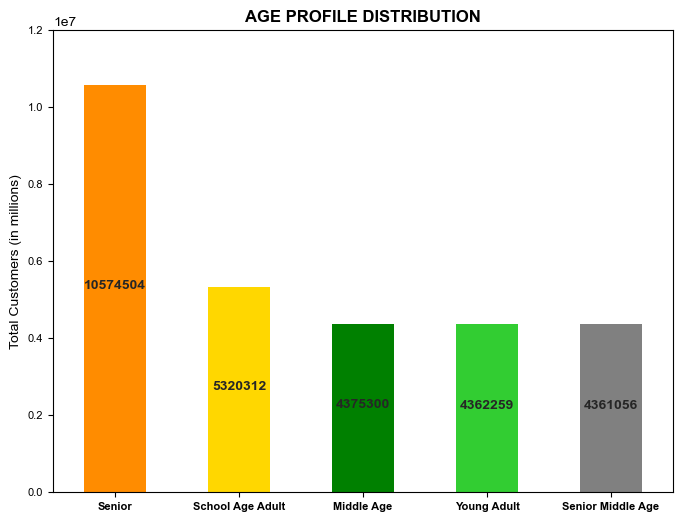

In [44]:
# Create a Bar Chart for Age Profile 

br_age_ctgry = df_cstmr_prfl['Age_Category'].value_counts().plot.bar(color = ['darkorange', 'gold', 'green', 'limegreen', 'grey'], rot = 0, figsize = (8,6))

# Adding Chart Labels
sns.set_style('ticks')
plt.ylim(0,12e6)
plt.ylabel('Total Customers (in millions)')
plt.xticks(fontsize = 8, fontweight = 'bold')
plt.yticks(fontsize = 8)
plt.title('AGE PROFILE DISTRIBUTION', fontweight = 'bold')

# add annotations
for c in br_age_ctgry.containers:

        # custom label
        labels = [f'{w:0.0f}' if (w := v.get_height()) > 0 else '' for v in c]
        br_age_ctgry.bar_label(c, labels = labels, label_type ='center', fontsize = 10, fontweight = 'bold', rotation = 0, padding = 2)

plt.show()

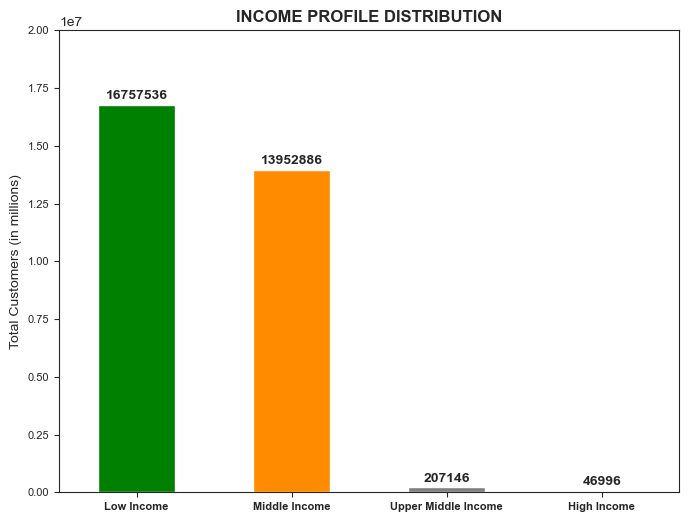

In [45]:
# Create a Bar Chart for Income Profile

br_incm_ctgry = df_cstmr_prfl['Income_Category'].value_counts().plot.bar(color = ['green', 'darkorange', 'grey', 'lightslategrey'], rot = 0, figsize = (8,6))

# Adding Chart Labels
sns.set_style('ticks')
plt.ylim(0,2e7)
plt.ylabel('Total Customers (in millions)')
plt.xticks(fontsize = 8, fontweight = 'bold')
plt.yticks(fontsize = 8)
plt.title('INCOME PROFILE DISTRIBUTION', fontweight = 'bold')

# add annotations
for c in br_incm_ctgry.containers:

        # custom label
        labels = [f'{w:0.0f}' if (w := v.get_height()) > 0 else '' for v in c]
        br_incm_ctgry.bar_label(c, labels = labels, label_type ='edge', fontsize = 10, fontweight = 'bold', rotation = 0, padding = 2)

plt.show()

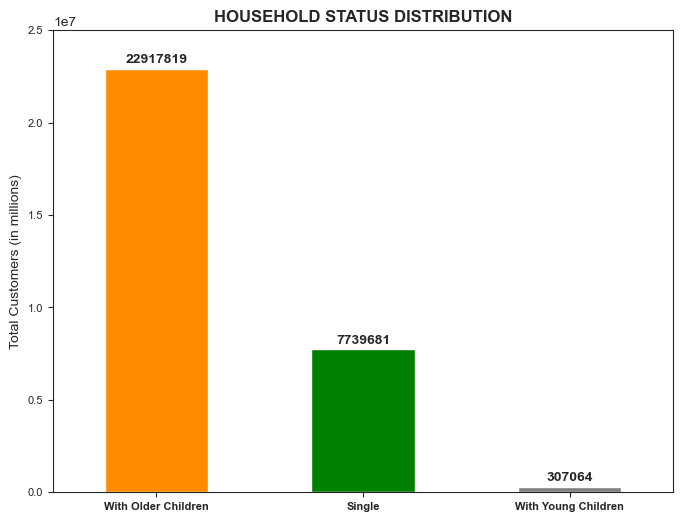

In [46]:
# Create a Bar Chart for Household Status Profile

br_hshld_stts = df_cstmr_prfl['Household_Status'].value_counts().plot.bar(color = ['darkorange', 'green', 'grey'], rot = 0, figsize = (8,6))

# Adding Chart Labels
sns.set_style('ticks')
plt.ylim(0,25e6)
plt.ylabel('Total Customers (in millions)')
plt.xticks(fontsize = 8, fontweight = 'bold')
plt.yticks(fontsize = 8)
plt.title('HOUSEHOLD STATUS DISTRIBUTION', fontweight = 'bold')

# add annotations
for c in br_hshld_stts.containers:

        # custom label
        labels = [f'{w:0.0f}' if (w := v.get_height()) > 0 else '' for v in c]
        br_hshld_stts.bar_label(c, labels = labels, label_type ='edge', fontsize = 10, fontweight = 'bold', rotation = 0, padding = 2)

plt.show()

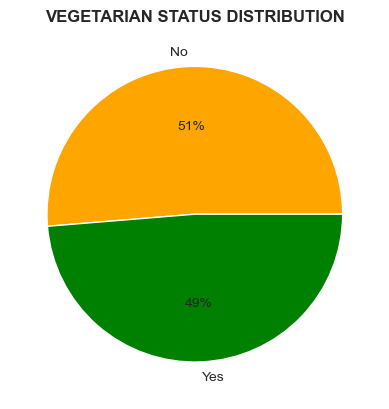

In [47]:
# Create a Pie Chart for Vegetarian Status Profile

pie_vgtrn_stts = df_cstmr_prfl['Vegetarian_Status'].value_counts().plot.pie(labels = ('No', 'Yes'), autopct = ('%1.f%%'), colors = ['orange','green'])

# Adding Chart Labels
sns.set_style('ticks')
plt.ylabel('')
plt.xticks(fontsize = 8, fontweight = 'bold')
plt.yticks(fontsize = 8)
plt.title('VEGETARIAN STATUS DISTRIBUTION', fontweight = 'bold')
plt.show()

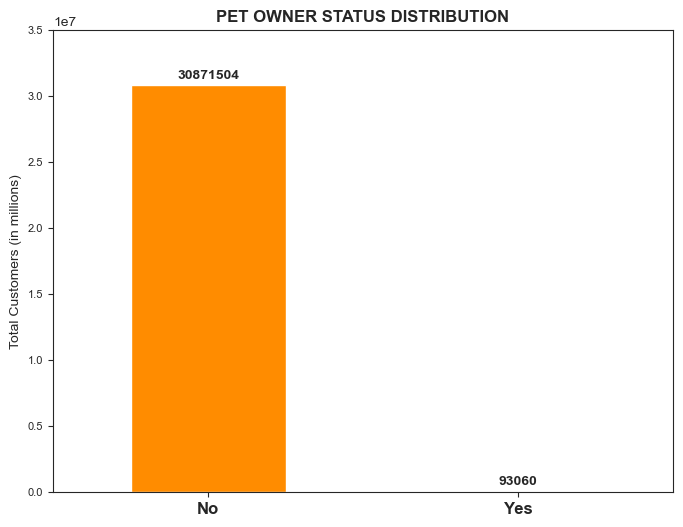

In [48]:
# Create a Bar Chart for Pet Owner Status Profile

br_pt_ownr = df_cstmr_prfl['Pet_Owner'].value_counts().plot.bar(color = ['darkorange', 'green'], rot = 0, figsize = (8,6))

# Adding Chart Labels

sns.set_style('ticks')
plt.ylim(0,35e6)
plt.ylabel('Total Customers (in millions)')
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 8)
plt.title('PET OWNER STATUS DISTRIBUTION', fontweight = 'bold')

# add annotations
for c in br_pt_ownr.containers:

        # custom label
        labels = [f'{w:0.0f}' if (w := v.get_height()) > 0 else '' for v in c]
        br_pt_ownr.bar_label(c, labels = labels, label_type ='edge', fontsize = 10, fontweight = 'bold', rotation = 0, padding = 2)

plt.show()

**NOTE:** 99.69% of customers have no pet product purchases an assuming they do not own pets.

**7. Aggregate the max, mean, and min variables on a customer-profile level for usage** _frequency_ **and** _expenditure_**.**

In [49]:
# Age Profile Usage Frequency Aggregation

age_usg_agg = df_cstmr_prfl.groupby('Age_Category').agg({'days_since_prior_order':['mean', 'min','max']})

age_usg_agg

days_since_prior_order           
                                    mean  min   max
Age_Category                                       
Middle Age                     10.811475  0.0  30.0
School Age Adult               10.815445  0.0  30.0
Senior                         10.800665  0.0  30.0
Senior Middle Age              10.839566  0.0  30.0
Young Adult                    10.807317  0.0  30.0

In [50]:
# Age Profile Expenditure Aggregation

age_expdtr_agg = df_cstmr_prfl.groupby('Age_Category').agg({'prices':['mean', 'min','max']})

age_expdtr_agg

prices              
                        mean  min      max
Age_Category                              
Middle Age         11.977867  1.0  99999.0
School Age Adult   12.419398  1.0  99999.0
Senior             11.724449  1.0  99999.0
Senior Middle Age  11.805172  1.0  99999.0
Young Adult        11.861903  1.0  99999.0

In [51]:
# Income Profile Usage Frequency Aggregation

incm_usg_agg = df_cstmr_prfl.groupby('Income_Category').agg({'days_since_prior_order':['mean', 'min','max']})

incm_usg_agg

days_since_prior_order           
                                      mean  min   max
Income_Category                                      
High Income                      10.308500  0.0  30.0
Low Income                       10.844781  0.0  30.0
Middle Income                    10.782121  0.0  30.0
Upper Middle Income              10.044455  0.0  30.0

In [52]:
# Income Profile Expenditure Aggregation

incm_expdtr_agg = df_cstmr_prfl.groupby('Income_Category').agg({'prices':['mean', 'min','max']})

incm_expdtr_agg

prices              
                           mean  min      max
Income_Category                              
High Income          222.992836  1.0  99999.0
Low Income             8.094506  1.0  99999.0
Middle Income         12.122358  1.0  99999.0
Upper Middle Income  261.895763  1.0  99999.0

In [53]:
# Household Profile Usage Frequency Aggregation

hshld_usg_agg = df_cstmr_prfl.groupby('Household_Status').agg({'days_since_prior_order':['mean', 'min','max']})

hshld_usg_agg

days_since_prior_order           
                                      mean  min   max
Household_Status                                     
Single                           10.791951  0.0  30.0
With Older Children              10.831001  0.0  30.0
With Young Children               9.737722  0.0  30.0

In [54]:
# Household Profile Expenditure Aggregation

hshld_expdtr_agg = df_cstmr_prfl.groupby('Household_Status').agg({'prices':['mean', 'min','max']})

hshld_expdtr_agg

prices              
                          mean  min      max
Household_Status                            
Single               12.102657  1.0  99999.0
With Older Children  11.933825  1.0  99999.0
With Young Children   7.647681  1.0     15.0

In [55]:
# Vegetarian Profile Usage Frequency Aggregation

vgtrn_usg_agg = df_cstmr_prfl.groupby('Vegetarian_Status').agg({'days_since_prior_order':['mean', 'min','max']})

vgtrn_usg_agg

days_since_prior_order           
                                    mean  min   max
Vegetarian_Status                                  
No                             10.946324  0.0  30.0
Yes                            10.667432  0.0  30.0

In [56]:
# Vegetarian Profile Expenditure Aggregation

vgtrn_expdtr_agg = df_cstmr_prfl.groupby('Vegetarian_Status').agg({'prices':['mean', 'min','max']})

vgtrn_expdtr_agg

prices              
                        mean  min      max
Vegetarian_Status                         
No                  7.527271  1.0     25.0
Yes                16.575703  1.0  99999.0

In [57]:
# Pet Owner Profile Usage Frequency Aggregation

pet_usg_agg = df_cstmr_prfl.groupby('Pet_Owner').agg({'days_since_prior_order':['mean', 'min','max']})

pet_usg_agg

days_since_prior_order           
                            mean  min   max
Pet_Owner                                  
No                     10.807946  0.0  30.0
Yes                    11.593531  0.0  30.0

In [58]:
# Pet Owner Profile Expenditure Aggregation

pet_expdtr_agg = df_cstmr_prfl.groupby('Pet_Owner').agg({'prices':['mean', 'min','max']})

pet_expdtr_agg

prices              
                mean  min      max
Pet_Owner                         
No         11.945718  1.0  99999.0
Yes         7.887489  1.0     15.0

**8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.**

**9. Produce suitable charts to illustrate your results and export them in your project folder.**

In [59]:
#1 Shopping habits (Order Day of Week) by Age Category and Check Output

Age_shppngdy = pd.crosstab(df_cstmr_prfl['order_day_of_week'], df_cstmr_prfl['Age_Category'])

Age_shppngdy

Age_Category,Middle Age,School Age Adult,Senior,Senior Middle Age,Young Adult
order_day_of_week,,,,,
0,835709,1017560,2015716,829701,833842
1,758185,933432,1834354,761778,775913
2,572761,689051,1374494,571899,561503
3,516489,624350,1261177,512966,520659
4,512236,621444,1236367,508951,514689
5,569122,694762,1379968,567682,568057
6,610798,739713,1472428,608079,587596


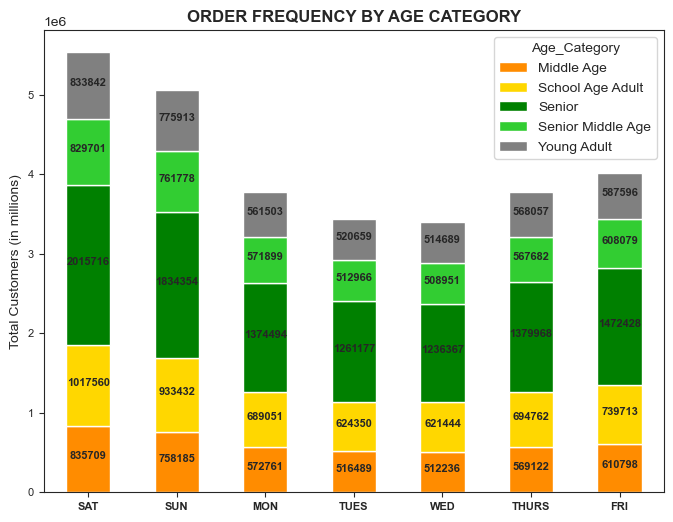

In [60]:
#1a Create a Stacked Bar for Age Category Profile of Shopping habits (Order Day of Week)

stckbr_age_shppngdy_hbts = Age_shppngdy.plot(kind = 'bar', stacked = True, color = ['darkorange', 'gold', 'green', 'limegreen', 'grey'], rot = 0, figsize = (8,6))

# Adding Chart Labels
sns.set_style('ticks')
stckbr_age_shppngdy_hbts.set_xticklabels(['SAT', 'SUN', 'MON', 'TUES', 'WED', 'THURS', 'FRI'])
plt.ylabel('Total Customers (in millions)')
plt.xlabel('')
plt.xticks(fontsize = 8, fontweight = 'bold')
plt.yticks(fontsize = 8)
plt.title('ORDER FREQUENCY BY AGE CATEGORY', fontweight = 'bold')

# add annotations
for c in stckbr_age_shppngdy_hbts.containers:

        # custom label
        labels = [f'{w:0.0f}' if (w := v.get_height()) > 0 else '' for v in c]
        stckbr_age_shppngdy_hbts.bar_label(c, labels = labels, label_type ='center', fontsize = 8, fontweight = 'bold', rotation = 0, padding = 2)

plt.show()

**LEGEND:** _Variables of  order_day_of_week_
     
      0 = Saturday            
      1 = Sunday               
      2 = Monday               
      3 = Tuesday
      4 = Wednesday
      5 = Thursday
      6 = Friday

**OBESERVATION:** Saturday have highest purchase activity in all age category making it the peak day of the week and Wednesday falls as the slowest day while Senior shows the highest activity rate in all days within the week.

In [61]:
#2 Shopping habits (Order Hour of Day) by Age Category and Check Output

Age_shppngtm = pd.crosstab(df_cstmr_prfl['order_hour_of_day'], df_cstmr_prfl['Age_Category'])

Age_shppngtm

Age_Category,Middle Age,School Age Adult,Senior,Senior Middle Age,Young Adult
order_hour_of_day,,,,,
0,29528,36393,68673,29040,30727
1,15615,19317,36077,15160,15841
2,9654,11892,22433,8191,9476
3,6846,8592,17007,6438,6853
4,6558,9126,18422,6850,6927
5,11352,15073,29845,11661,11197
6,39201,50710,95523,39918,39137
7,116656,149844,299048,125868,118728
8,234590,283683,568589,234650,232728


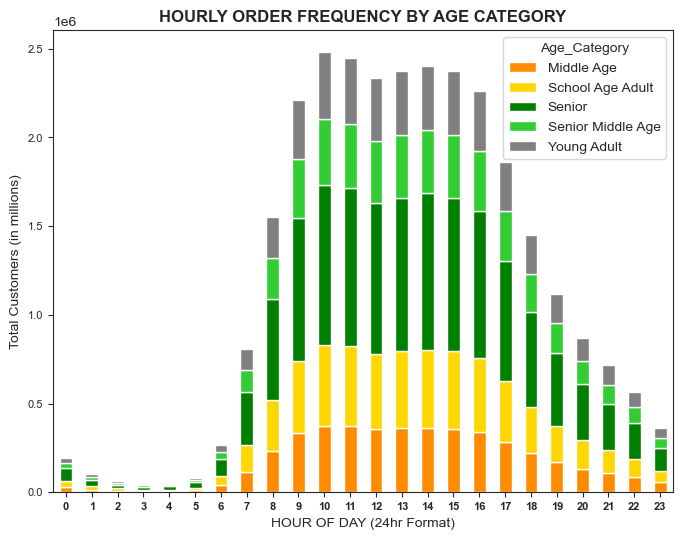

In [62]:
#2a Create a Stacked Bar for Age Category Profile of Shopping habits (Order Hour of Day)

stckbr_age_shppngtm_hbts = Age_shppngtm.plot(kind = 'bar', stacked = True, color = ['darkorange', 'gold', 'green', 'limegreen', 'grey'], rot = 0, figsize = (8,6))

# Adding Chart Labels
sns.set_style('ticks')
plt.ylabel('Total Customers (in millions)')
plt.xlabel('HOUR OF DAY (24hr Format)')
plt.xticks(fontsize = 8, fontweight = 'bold')
plt.yticks(fontsize = 8)
plt.title('HOURLY ORDER FREQUENCY BY AGE CATEGORY', fontweight = 'bold')
plt.show()

In [63]:
#3 Income by Age Category and Check Output

Age_incm = pd.crosstab(df_cstmr_prfl['Income_Category'], df_cstmr_prfl['Age_Category'])

Age_incm

Age_Category,Middle Age,School Age Adult,Senior,Senior Middle Age,Young Adult
Income_Category,,,,,
High Income,12756,0,24193,6121,0
Low Income,1630328,5151654,3178786,1319897,4220671
Middle Income,2694119,150142,7285990,3004017,125100
Upper Middle Income,38097,18516,85535,31021,16488


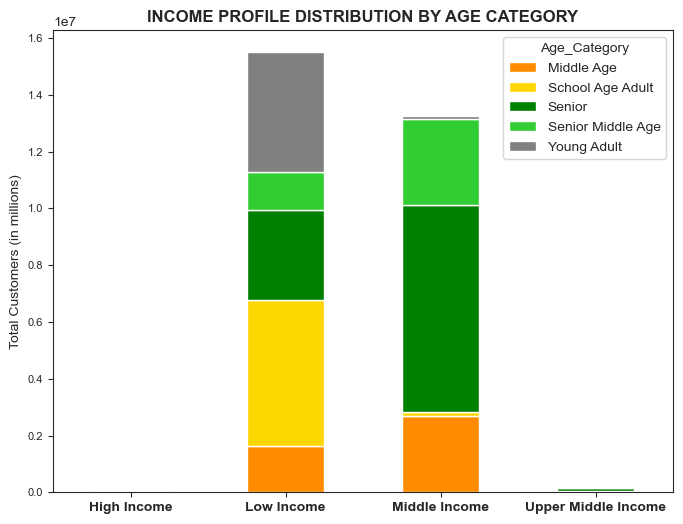

In [64]:
#3a Create a Stacked Bar for Income distribution of Age Category Profile

stckbr_age_incm = Age_incm.plot(kind = 'bar', stacked = True, color = ['darkorange', 'gold', 'green', 'limegreen', 'grey'], rot = 0, figsize = (8,6))

# Adding Chart Labels
sns.set_style('ticks')
plt.ylabel('Total Customers (in millions)')
plt.xlabel('')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 8)
plt.title('INCOME PROFILE DISTRIBUTION BY AGE CATEGORY', fontweight = 'bold')

plt.show()

**OBERSVATION:** Overall 54% of customer have low income, while 32% of its composition are within the School Age adult. 

In [65]:
#4 Loyalty buyer by Age Category and Check Output

Age_lylty = pd.crosstab(df_cstmr_prfl['loyalty_flag'], df_cstmr_prfl['Age_Category'])

Age_lylty

Age_Category,Middle Age,School Age Adult,Senior,Senior Middle Age,Young Adult
loyalty_flag,,,,,
Loyal customer,1458661,1751575,3514773,1458203,1448335
New customer,678747,827675,1649975,686279,669952
Regular customer,2237892,2741062,5409756,2216574,2243972


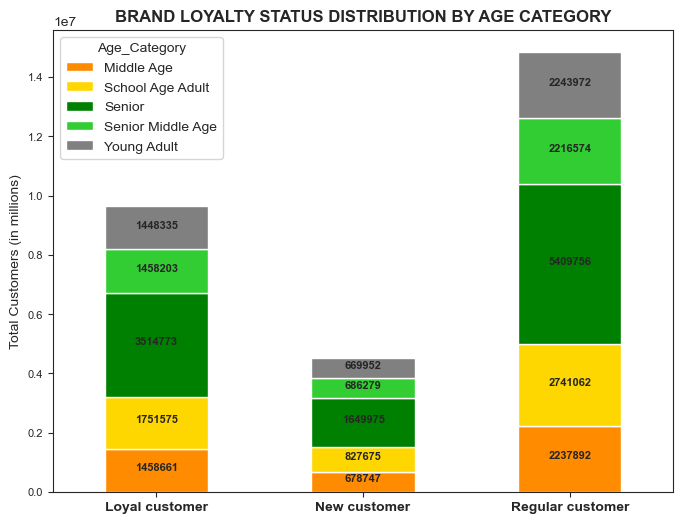

In [66]:
#4a Create a Stacked Bar for Age Category of Loyalty Buyers

stckbr_age_lylty = Age_lylty.plot(kind = 'bar', stacked = True, color = ['darkorange', 'gold', 'green', 'limegreen', 'grey'], rot = 0, figsize = (8,6))

# Adding Chart Labels
sns.set_style('ticks')
plt.ylabel('Total Customers (in millions)')
plt.xlabel('')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 8)
plt.title('BRAND LOYALTY STATUS DISTRIBUTION BY AGE CATEGORY', fontweight = 'bold')

# add annotations
for c in stckbr_age_lylty.containers:

        # custom label
        labels = [f'{w:0.0f}' if (w := v.get_height()) > 0 else '' for v in c]
        stckbr_age_lylty.bar_label(c, labels = labels, label_type ='center', fontsize = 8, fontweight = 'bold', rotation = 0, padding = 2)

plt.show()

**OBESERVATION:** There's a higher concentration of regular customers while, seniors have the highest count in all groups.

In [67]:
#5 Income Category per Household Status and Check Output

Incm_Hshld = pd.crosstab(df_cstmr_prfl['Household_Status'], df_cstmr_prfl['Income_Category'])

Incm_Hshld

Income_Category,High Income,Low Income,Middle Income,Upper Middle Income
Household_Status,,,,
Single,12115,4170725,3504350,52491
With Older Children,34643,12427967,10301961,153248
With Young Children,238,158844,146575,1407


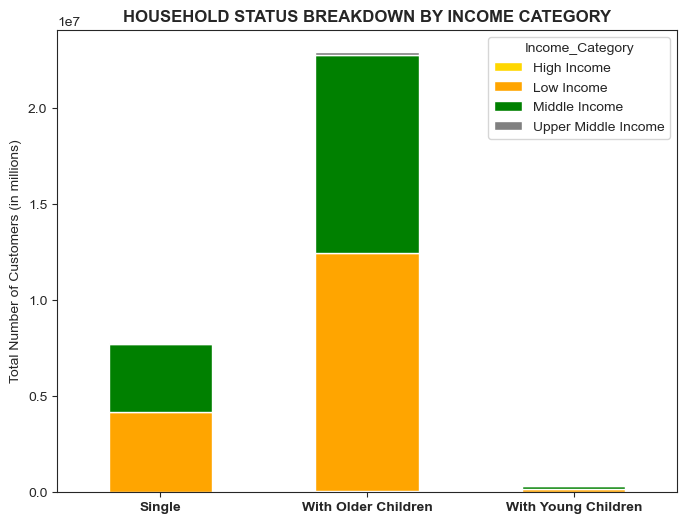

In [68]:
#5a Create a Stacked Bar for Household Status distribution by Income Category

stckbr_incme_Hshld = Incm_Hshld.plot(kind = 'bar', stacked = True, color = ['gold', 'orange', 'green', 'grey'], rot = 0, figsize = (8,6))

# Adding Chart Labels
sns.set_style('ticks')
plt.ylabel('Total Number of Customers (in millions)')
plt.xlabel('')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10)
plt.title('HOUSEHOLD STATUS BREAKDOWN BY INCOME CATEGORY', fontweight = 'bold')

plt.show()

**OBSERVATION:** Majority of the households have older children, 54% have low income.

In [69]:
#6 Loyalty buyer by Income Category and Check Output

Incm_Ctgry_lylty = pd.crosstab(df_cstmr_prfl['loyalty_flag'], df_cstmr_prfl['Income_Category'])

Incm_Ctgry_lylty

Income_Category,High Income,Low Income,Middle Income,Upper Middle Income
loyalty_flag,,,,
Loyal customer,16514,5525884,4658742,82953
New customer,3835,2660144,2122033,17683
Regular customer,26647,8571508,7172111,106510


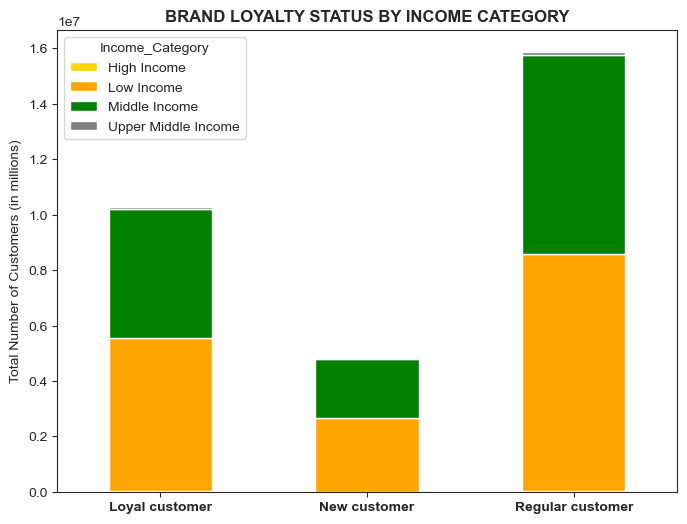

In [70]:
#6a Create a Stacked Bar for Income Category Profile for Loyalty buyers

stckbr_incm_lylty = Incm_Ctgry_lylty.plot(kind = 'bar', stacked = True, color = ['gold', 'orange', 'green', 'grey'], rot = 0, figsize = (8,6))

# Adding Chart Labels
sns.set_style('ticks')
plt.ylabel('Total Number of Customers (in millions)')
plt.xlabel('')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10)
plt.title('BRAND LOYALTY STATUS BY INCOME CATEGORY', fontweight = 'bold')

plt.show()

In [71]:
#7 Shopping habits (Order Hour of Day) by Household Status and Check Output

Hshld_Shppngtm = pd.crosstab(df_cstmr_prfl['order_hour_of_day'], df_cstmr_prfl['Household_Status'])

Hshld_Shppngtm

Household_Status,Single,With Older Children,With Young Children
order_hour_of_day,,,
0,51434,154745,1863
1,26731,82075,815
2,16732,48517,442
3,12375,36069,352
4,12205,38145,413
5,21284,62370,764
6,70870,206435,3708
7,220071,631049,12093
8,415947,1222160,21003


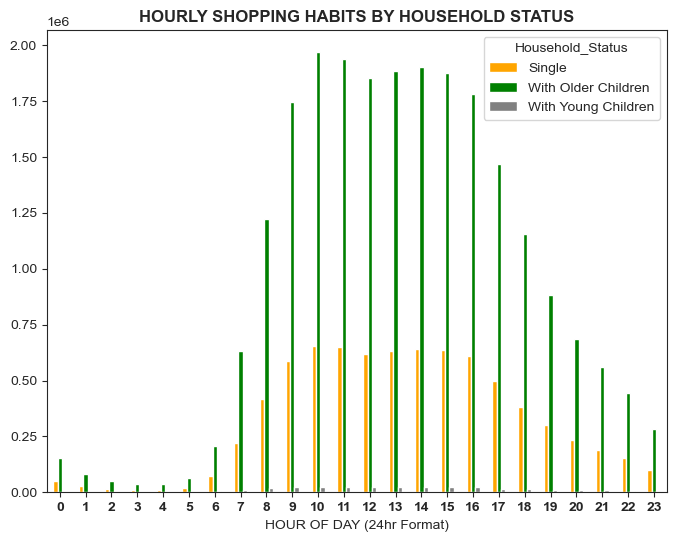

In [72]:
#7a Create a Bar Chart for Household Status Profile of Shopping habits (Order Hour of Day)

br_hshld_shppngtm = Hshld_Shppngtm.plot(kind = 'bar', color = ['orange', 'green', 'grey'], rot = 0, figsize = (8,6))

# Adding Chart Labels
sns.set_style('ticks')
plt.xlabel('HOUR OF DAY (24hr Format)')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10)
plt.title('HOURLY SHOPPING HABITS BY HOUSEHOLD STATUS', fontweight = 'bold')

plt.show()

In [73]:
#8 Loyalty buyer by Household Status and Check Output

Hshld_Ctgry_lylty = pd.crosstab(df_cstmr_prfl['loyalty_flag'], df_cstmr_prfl['Household_Status'])

Hshld_Ctgry_lylty

Household_Status,Single,With Older Children,With Young Children
loyalty_flag,,,
Loyal customer,2588844,7571007,124242
New customer,1201265,3567948,34482
Regular customer,3949572,11778864,148340


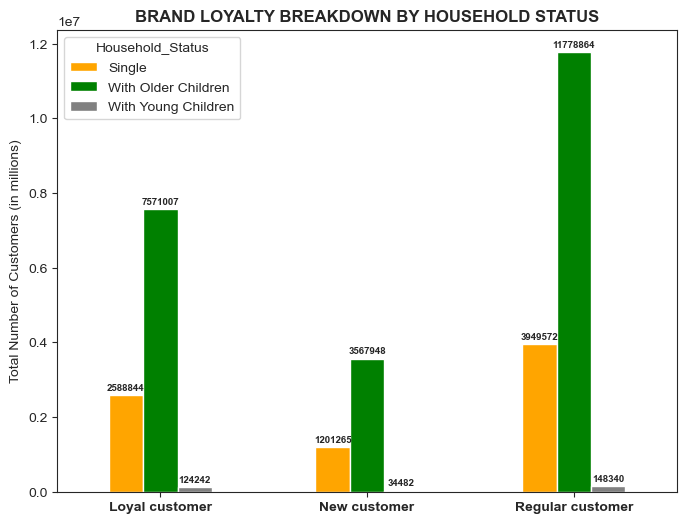

In [74]:
#8a Create a Bar Chart for Loyalty Buyers by Household Status Profile

br_hshld_lylty = Hshld_Ctgry_lylty.plot(kind = 'bar', color = ['orange', 'green', 'grey'], rot = 0, figsize = (8,6))

# Adding Chart Labels
sns.set_style('ticks')
plt.ylabel('Total Number of Customers (in millions)')
plt.xlabel('')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10)
plt.title('BRAND LOYALTY BREAKDOWN BY HOUSEHOLD STATUS', fontweight = 'bold')

# add annotations
for c in br_hshld_lylty.containers:

        # custom label
        labels = [f'{w:0.0f}' if (w := v.get_height()) > 0 else '' for v in c]
        br_hshld_lylty.bar_label(c, labels = labels, label_type = 'edge', fontsize = 7, fontweight = 'bold', rotation = 0, padding = 2)

plt.show()

In [75]:
#9 Shopping habits (Order Hour of Day) by Household Status and Check Output

Vgtrn_Shppngtm = pd.crosstab(df_cstmr_prfl['order_hour_of_day'], df_cstmr_prfl['Vegetarian_Status'])

Vgtrn_Shppngtm

Vegetarian_Status,No,Yes
order_hour_of_day,,
0,104274,103768
1,56564,53057
2,34844,30847
3,26175,22621
4,26972,23791
5,42657,41761
6,139304,141709
7,425026,438187
8,826713,832397


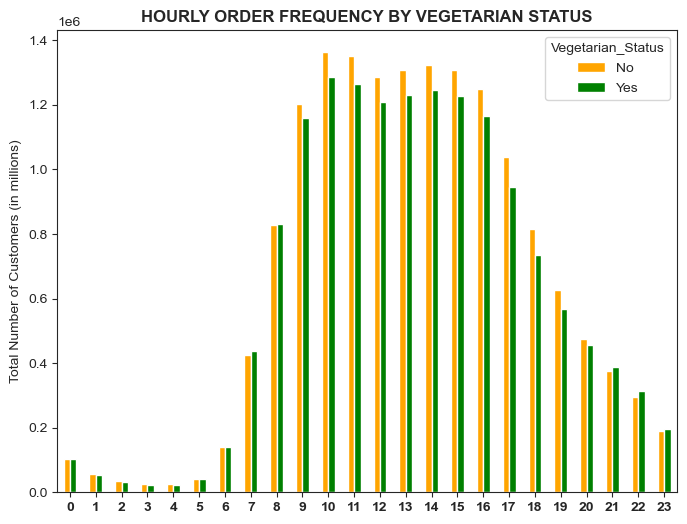

In [76]:
#9a Create a Bar Chart for Vegetarian Status Profile (Order Hour of Day)

br_vgtrn_shppngtm = Vgtrn_Shppngtm.plot(kind = 'bar', color = ['orange', 'green'], rot = 0, figsize = (8,6))

# Adding Chart Labels
sns.set_style('ticks')
plt.ylabel('Total Number of Customers (in millions)')
plt.xlabel('')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10)
plt.title('HOURLY ORDER FREQUENCY BY VEGETARIAN STATUS', fontweight = 'bold')


plt.show()

In [77]:
#10 Loyalty buyer by Vegetarian Status and Check Output

Hshld_Vgtrn_lylty = pd.crosstab(df_cstmr_prfl['loyalty_flag'], df_cstmr_prfl['Vegetarian_Status'])

Hshld_Vgtrn_lylty

Vegetarian_Status,No,Yes
loyalty_flag,,
Loyal customer,5063430,5220663
New customer,2572199,2231496
Regular customer,8250344,7626432


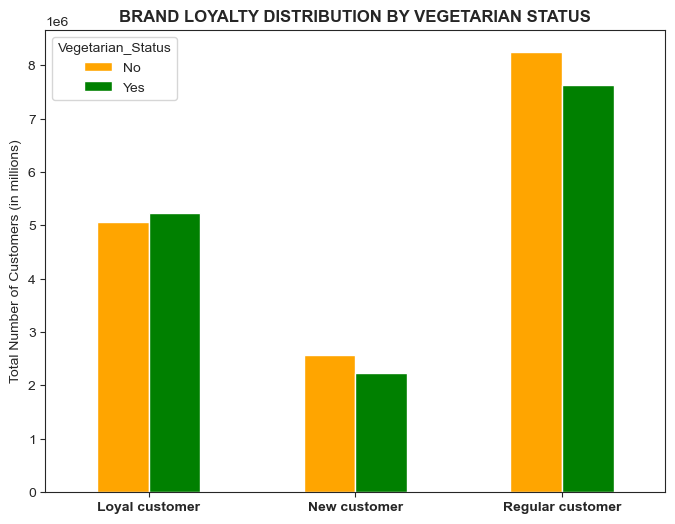

In [78]:
#10a Create a Bar Chart for Vegetarian Status Profile for Loyalty Buyers

br_vgtrn_lylty = Hshld_Vgtrn_lylty.plot(kind = 'bar', color = ['orange', 'green'], rot = 0, figsize = (8,6))

# Adding Chart Labels
sns.set_style('ticks')
plt.ylabel('Total Number of Customers (in millions)')
plt.xlabel('')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10)
plt.title('BRAND LOYALTY DISTRIBUTION BY VEGETARIAN STATUS', fontweight = 'bold')


plt.show()

In [79]:
#11 Department distribution Order Freguency (Hour of day) Check Output

dept_lylty = pd.crosstab(df_cstmr_prfl['department'], df_cstmr_prfl['loyalty_flag'])

dept_lylty

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


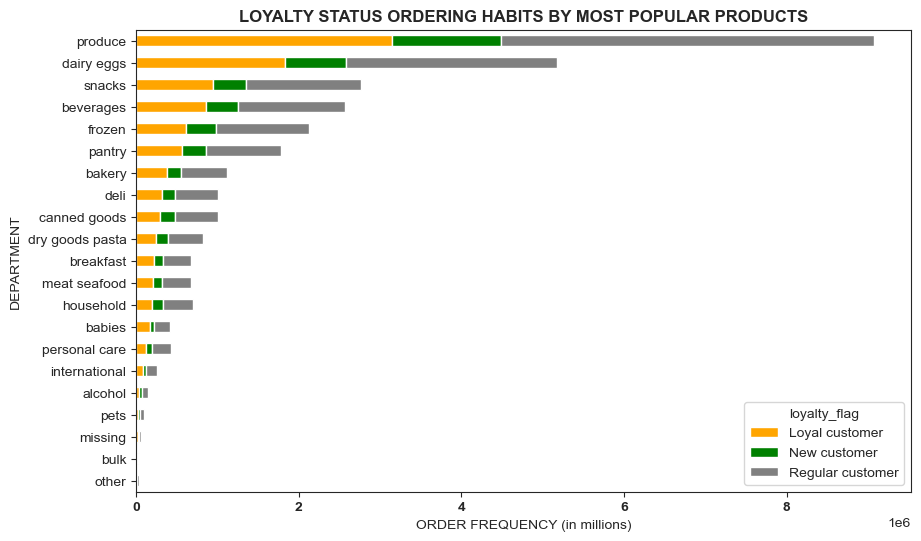

In [80]:
#11a Create a Bar Chart for department distribution by Loyalty Status

br_dept_lylty = dept_lylty.sort_values(by = 'Loyal customer', ascending = True).plot(kind = 'barh', stacked = True, color = ['orange', 'green', 'grey'], rot = 0, figsize = (10,6))

# Adding Chart Labels
sns.set_style('ticks')
plt.ylabel('DEPARTMENT')
plt.xlabel('ORDER FREQUENCY (in millions)')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10)
plt.title('LOYALTY STATUS ORDERING HABITS BY MOST POPULAR PRODUCTS', fontweight = 'bold')

plt.show()

In [81]:
#12 Department distribution Order Freguency by Region Check Output

dept_dstrbn = pd.crosstab(df_cstmr_prfl['department'], df_cstmr_prfl['Region'])

dept_dstrbn

Region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


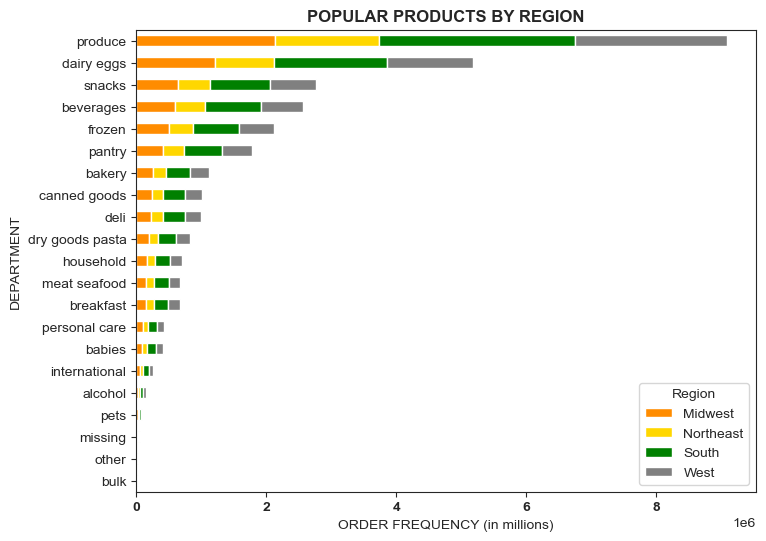

In [82]:
#12a Create a Bar Chart for department distribution Order Freguency (Day of Week)

br_dept_dstrbn = dept_dstrbn.sort_values(by = 'South', ascending = True).plot(kind = 'barh', stacked = True, color = ['darkorange', 'gold', 'green', 'grey'], rot = 0, figsize = (8,6))

# Adding Chart Labels
sns.set_style('ticks')
plt.ylabel('DEPARTMENT')
plt.xlabel('ORDER FREQUENCY (in millions)')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10)
plt.title('POPULAR PRODUCTS BY REGION', fontweight = 'bold')

plt.show()

In [83]:
#13 Regional distribution of Loyalty Customers Check Output

lylty_dstrbn = pd.crosstab(df_cstmr_prfl['Region'], df_cstmr_prfl['loyalty_flag'])

lylty_dstrbn

loyalty_flag,Loyal customer,New customer,Regular customer
Region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


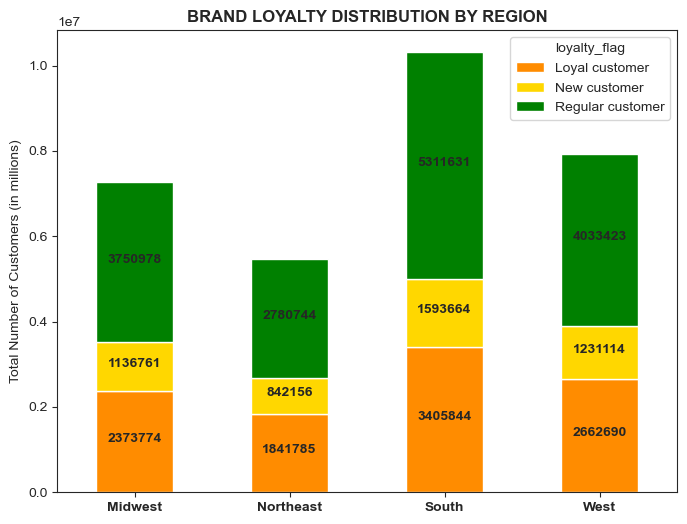

In [84]:
#13a Create a Bar Chart for Regional distribution of Loyalty Customers

br_lylty_dstrbn = lylty_dstrbn.plot(kind = 'bar', stacked = True, color = ['darkorange', 'gold', 'green', 'grey'], rot = 0, figsize = (8,6))

# Adding Chart Labels
sns.set_style('ticks')
plt.ylabel('Total Number of Customers (in millions)')
plt.xlabel('')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10)
plt.title('BRAND LOYALTY DISTRIBUTION BY REGION', fontweight = 'bold')

# add annotations
for c in br_lylty_dstrbn.containers:

        # custom label
        labels = [f'{w:0.0f}' if (w := v.get_height()) > 0 else '' for v in c]
        br_lylty_dstrbn.bar_label(c, labels = labels, label_type ='center', fontsize = 10, fontweight = 'bold', rotation = 0, padding = 2)

plt.show()

In [85]:
#14 Loyalty Flag Order Freguency Check Output

ordr_frqncy_lylty = pd.crosstab(df_cstmr_prfl['order_frequency_flag'], df_cstmr_prfl['loyalty_flag'])

ordr_frqncy_lylty

loyalty_flag,Loyal customer,New customer,Regular customer
order_frequency_flag,,,
Frequent customer,10279960,1293294,9631222
Non-frequent customer,0,1983500,911475
Regular customer,4133,1526901,5334079


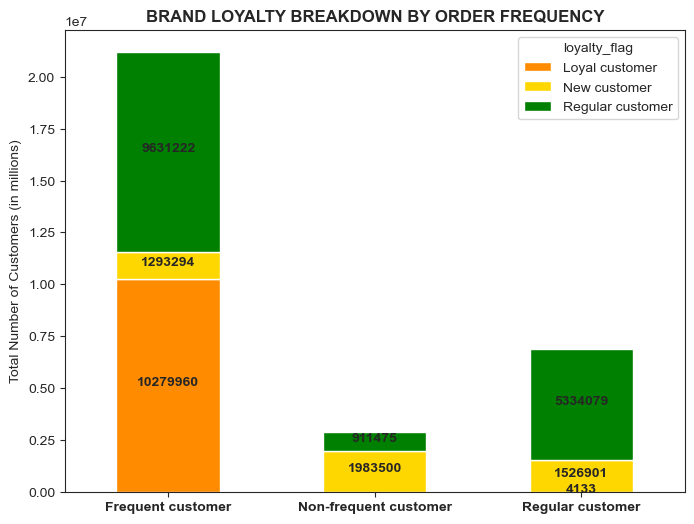

In [86]:
#14a Create a Bar Chart for department distribution of Loyalty Customers

br_lylty_ordr_frqncy = ordr_frqncy_lylty.plot(kind = 'bar', stacked = True, color = ['darkorange', 'gold', 'green', 'grey'], rot = 0, figsize = (8,6))

# Adding Chart Labels
sns.set_style('ticks')
plt.ylabel('Total Number of Customers (in millions)')
plt.xlabel('')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10)
plt.title('BRAND LOYALTY BREAKDOWN BY ORDER FREQUENCY', fontweight = 'bold')

total = float(len(ordr_frqncy_lylty))

# add annotations
for c in br_lylty_ordr_frqncy.containers:

        # custom label
        labels = [f'{w:0.0f}' if (w := v.get_height()) > 0 else '' for v in c]
        br_lylty_ordr_frqncy.bar_label(c, labels = labels, label_type ='center', fontsize = 10, fontweight = 'bold', rotation = 0, padding = 2)


plt.show()

In [87]:
#15 Loyalty Flag Price Range Check Output

prc_rng_lylty = pd.crosstab(df_cstmr_prfl['price_range'], df_cstmr_prfl['loyalty_flag'])

prc_rng_lylty

loyalty_flag,Loyal customer,New customer,Regular customer
price_range,,,
High-range product,119936,65927,212090
Low-range product,3214690,1501288,4958862
Mid-range product,6949467,3236480,10705824


In [88]:
#16 Department Price Range and Check Output

dept_prc_rnge = pd.crosstab(df_cstmr_prfl['department'], df_cstmr_prfl['price_range'])

dept_prc_rnge

price_range,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,33046,111581
babies,0,121484,288908
bakery,0,274986,845842
beverages,0,814697,1757204
breakfast,0,209185,461665
bulk,0,1181,32270
canned goods,0,281711,730363
dairy eggs,4877,1370908,3801397
deli,0,299220,704614


In [89]:
#17 Department Order Frequency Aggregation

dept_ordr_agg = df_cstmr_prfl.groupby('department').agg({'reordered':['mean', 'min','max']})

dept_ordr_agg

reordered        
                     mean min max
department                       
alcohol          0.590166   0   1
babies           0.591220   0   1
bakery           0.644934   0   1
beverages        0.669548   0   1
breakfast        0.577357   0   1
bulk             0.589788   0   1
canned goods     0.473826   0   1
dairy eggs       0.686309   0   1
deli             0.624485   0   1
dry goods pasta  0.477434   0   1
frozen           0.558728   0   1
household        0.418078   0   1
international    0.382396   0   1
meat seafood     0.585137   0   1
missing          0.409369   0   1
other            0.422510   0   1
pantry           0.359807   0   1
personal care    0.334148   0   1
pets             0.619170   0   1
produce          0.666655   0   1
snacks           0.589307   0   1

In [90]:
#18 Loyalty Flag Price Range Check Output

prc_rng_lylty = pd.crosstab(df_cstmr_prfl['spender_flag'], df_cstmr_prfl['loyalty_flag'])

prc_rng_lylty

loyalty_flag,Loyal customer,New customer,Regular customer
spender_flag,,,
High spender,216600,84011,302814
Low spender,10067493,4719684,15573962


In [91]:
#19 Spending habits (spending_flag) by price range Check Output

spdnghbts_prc_rng = pd.crosstab(df_cstmr_prfl['price_range'], df_cstmr_prfl['spender_flag'])

spdnghbts_prc_rng

spender_flag,High spender,Low spender
price_range,,
High-range product,18454,379499
Low-range product,171045,9503795
Mid-range product,413926,20477845


In [92]:
#20 Age ordering habits by department Check Output

spdnghbts_age_dept = pd.crosstab(df_cstmr_prfl['department'], df_cstmr_prfl['Age_Category'])

spdnghbts_age_dept

Age_Category,Middle Age,School Age Adult,Senior,Senior Middle Age,Young Adult
department,,,,,
alcohol,19754,25820,47596,20329,21015
babies,59581,71595,138738,57555,56066
bakery,158741,192443,382446,158752,158536
beverages,363204,436781,883669,365702,358838
breakfast,95041,117717,227751,95044,93735
bulk,4855,5870,11424,4555,4766
canned goods,141622,175612,344447,143281,141418
dairy eggs,733580,893099,1762512,720690,735438
deli,142735,172228,343335,140258,141962


In [93]:
#21 Order frequency by department and Check Output

df_cstmr_prfl['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

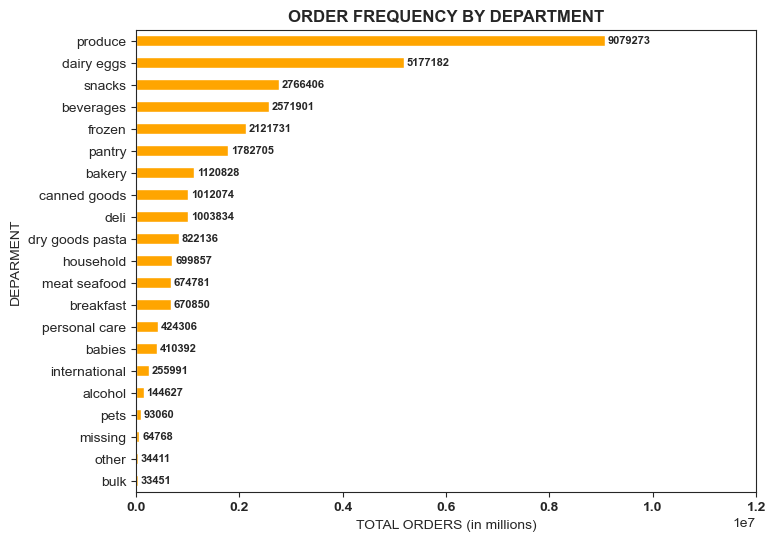

In [94]:
#22 Create a Bar Chart Order frequency by department

ordr_dept = df_cstmr_prfl['department'].value_counts(ascending = True).plot.barh(color = ['orange'], rot = 0, figsize = (8,6))

# Adding Chart Labels
sns.set_style('ticks')
plt.xlim (0,12e6)
plt.ylabel('DEPARMENT')
plt.xlabel('TOTAL ORDERS (in millions)')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10)
plt.title('ORDER FREQUENCY BY DEPARTMENT', fontweight = 'bold')

total = float(len(ordr_frqncy_lylty))

# add annotations
for c in ordr_dept.containers:

        # custom label
        labels = [f'{w:0.0f}' if (w := v.get_width()) > 0 else '' for v in c]
        ordr_dept.bar_label(c, labels = labels, label_type ='edge', fontsize = 8, fontweight = 'bold', rotation = 0, padding = 2)


plt.show()

In [95]:
#22 Income by Region and Check Output

incm_dstrbn = pd.crosstab(df_cstmr_prfl['Region'], df_cstmr_prfl['Income_Category'])

incm_dstrbn

Income_Category,High Income,Low Income,Middle Income,Upper Middle Income
Region,,,,
Midwest,16387,3861420,3336000,47706
Northeast,6678,2948201,2476378,33428
South,12237,5647568,4580125,71209
West,11694,4300347,3560383,54803


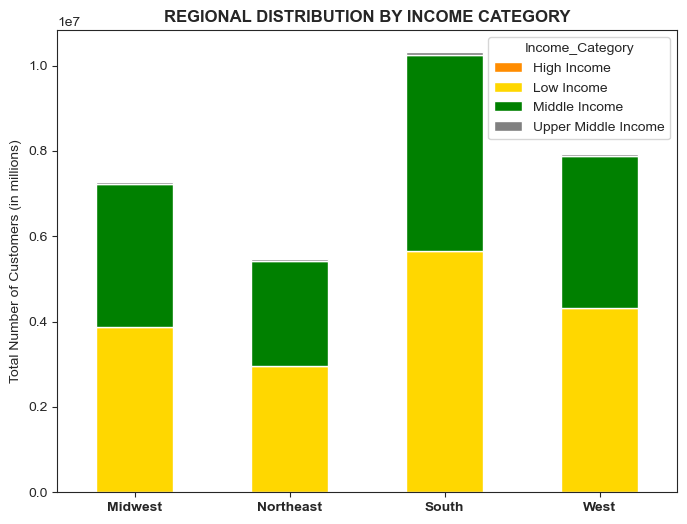

In [96]:
#22a Create a Bar Chart for department distribution of Loyalty Customers

br_incm_dstrbn = incm_dstrbn.plot(kind = 'bar', stacked = True, color = ['darkorange', 'gold', 'green', 'grey'], rot = 0, figsize = (8,6))

# Adding Chart Labels
sns.set_style('ticks')
plt.ylabel('Total Number of Customers (in millions)')
plt.xlabel('')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10)
plt.title('REGIONAL DISTRIBUTION BY INCOME CATEGORY', fontweight = 'bold')

plt.show()

**10. Exporting Updated DataFrame and Charts.**

In [97]:
# Exporting DataFrames

# Spending Habits DataFrame 
Spending_Habits.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Spending Habits.csv'))

# High Activity Customers DataFrame 
df_cstmr_prfl.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'High Activity Customers.csv'))


# Usage Frquency & Expenditure Aggregate and other DataFrame 

age_usg_agg.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Age Usage Frqncy.csv'))
age_expdtr_agg.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Age Expenditure.csv'))

incm_usg_agg.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Income Usage Frqncy.csv'))
incm_expdtr_agg.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Income Expenditure.csv'))

hshld_usg_agg.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Hshld Status Usage Frqncy.csv'))
hshld_expdtr_agg.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Hshld Status Expenditure.csv'))

vgtrn_usg_agg.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Vgtrn Status Usage Frqncy.csv'))
vgtrn_expdtr_agg.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Vgtrn Status Expenditure.csv'))

pet_usg_agg.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Pet Owner Usage Frqncy.csv'))
pet_expdtr_agg.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Pet Owner Expenditure.csv'))
dept_ordr_agg.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Dept Reorder Count.csv'))


# Additional DataFrame Files

Incm_Hshld.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Viz Incm-Hshld.csv'))
Hshld_Shppngtm.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Viz Hrly Spndng Hbts Hshld.csv'))
Hshld_Ctgry_lylty.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Viz Hshld Loyaty Group.csv'))
dept_lylty.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Viz Dept Loyalty.csv'))
dept_dstrbn.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Viz Dept Rgnl Dstrbn.csv'))
dept_prc_rnge.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Viz Dept Price Range.csv'))

In [98]:
# Exporting charts to folder as image
# Visualization Charts for Profiles 

br_age_ctgry.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age Profile.png'))
br_incm_ctgry.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Income Category.png'))
br_hshld_stts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Household Status.png'))
pie_vgtrn_stts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Vegetarian Status.png'))
br_pt_ownr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pet Owner.png'))


In [99]:
# Exporting charts to folder as image

# Visualization Charts for Age Group Analysis
stckbr_age_shppngdy_hbts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age Daily Spndng Hbts.png'))
stckbr_age_shppngtm_hbts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age Hrly Spndng Hbts.png'))
stckbr_age_incm.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age Group Income.png'))
stckbr_age_lylty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age Loyalty Group.png'))

# Visualization Charts for Income Category Analysis
stckbr_incme_Hshld.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Incm Hshld Group.png'))
stckbr_incm_lylty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Incm Lylty Group.png'))
br_incm_dstrbn.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Incm Rgnl Dstrbtn.png'))

# Visualization Charts for Household Status Analysis
br_hshld_shppngtm.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Hshld Hrly Spndng Hbts.png'))
br_hshld_lylty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Hshld Loyalty Group.png'))

# Visualization Charts for Vegetarian Status Analysis
br_vgtrn_shppngtm.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Vgtrn Hrly Spndng Hbts.png'))
br_vgtrn_lylty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Vgtrn Loyalty Group.png'))

# Visualization Charts for Department Analysis
br_dept_lylty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Dept Loyalty Group.png'))
br_dept_dstrbn.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Dept Rgnl Dstrbtn.png'))
ordr_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Dept Ordr Frqncy.png'))

# Visualization Charts for Additional Loyalty Customer Analysis
br_lylty_ordr_frqncy.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Lylty Ordr Fqncy.png'))
